In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
# Let us now go ahead and read the dataset and check the frist 5 rows of the dataset

company = pd.read_csv('Data.csv')
company.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
company.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [5]:
print("The num of rows (observation) is", company.shape[0], '\n', 'The num of columns (variables) is', company.shape[1])

The num of rows (observation) is 58592 
 The num of columns (variables) is 44


In [6]:
company.shape

(58592, 44)

## EDA

In [7]:
#Checking Null Values
company.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
#Checking Duplicates
company.duplicated().sum()

0

In [9]:
# Now, let us check the basis measures of descriptive statistics for the continuous variable
company.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [10]:
company.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
len(company["area_cluster"].unique())

22

In [12]:
company.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [13]:
company[["area_cluster","segment","model","fuel_type","max_torque","engine_type","is_esc", "is_adjustable_steering", 
         "is_tpms", "is_parking_sensors","is_parking_camera","is_front_fog_lights",
       "is_rear_window_wiper", "is_rear_window_washer",
       "is_rear_window_defogger", "is_brake_assist", "is_power_door_locks",
       "is_central_locking", "is_power_steering",
       "is_driver_seat_height_adjustable", "is_day_night_rear_view_mirror",
       "is_ecw", "is_speed_alert"]].apply(lambda x: x.unique())

area_cluster                        [C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11,...
segment                                                  [A, C1, C2, B2, B1, Utility]
model                                  [M1, M2, M3, M4, M5, M6, M7, M8, M9, M10, M11]
fuel_type                                                       [CNG, Petrol, Diesel]
max_torque                          [60Nm@3500rpm, 113Nm@4400rpm, 91Nm@4250rpm, 25...
engine_type                         [F8D Petrol Engine, 1.2 L K12N Dualjet, 1.0 SC...
is_esc                                                                      [No, Yes]
is_adjustable_steering                                                      [No, Yes]
is_tpms                                                                     [No, Yes]
is_parking_sensors                                                          [Yes, No]
is_parking_camera                                                           [No, Yes]
is_front_fog_lights                                   

In [14]:
company_sub1=company.drop("is_claim",axis=1)

In [15]:
#Handing Binary Columns
Bin_feature=["is_esc", "is_adjustable_steering", 
         "is_tpms", "is_parking_sensors","is_parking_camera","is_front_fog_lights",
       "is_rear_window_wiper", "is_rear_window_washer",
       "is_rear_window_defogger", "is_brake_assist", "is_power_door_locks",
       "is_central_locking", "is_power_steering",
       "is_driver_seat_height_adjustable", "is_day_night_rear_view_mirror",
       "is_ecw", "is_speed_alert"]
for x in Bin_feature:
    company_sub1[x]=company_sub1[x].replace({'Yes':1,'No':0})

company_sub1.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,1,1,1,1,1,1,1,1,1,2
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,0,0,1,1,1,0,1,1,1,2


In [16]:
for x in company_sub1.columns:
    print(x,'--->', company_sub1[x].unique())
    print('-'*10)

policy_id ---> ['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
----------
policy_tenure ---> [0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
----------
age_of_car ---> [0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
----------
age_of_policyholder ---> [0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.65384615 0.7307

In [17]:
company_sub1=company_sub1.drop("policy_id",axis=1)

In [18]:
company_sub1.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,0,0,1,1,1,0,1,1,1,2


In [19]:
#Handling Caltegorical Columns
company_sub1["fuel_type"]=company_sub1["fuel_type"].replace({'CNG':1 ,'Petrol':2 ,'Diesel':3})
company_sub1["rear_brakes_type"]=company_sub1["rear_brakes_type"].replace({'Drum':1, 'Disc':2})
company_sub1["transmission_type"]=company_sub1["transmission_type"].replace({'Manual':1 ,'Automatic':2})
company_sub1["steering_type"]=company_sub1["steering_type"].replace({'Power':1 ,'Electric':2 ,'Manual':3})

company_sub1.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,1,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,1,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,1,60Nm@3500rpm,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,2,113Nm@4400rpm,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,2,91Nm@4250rpm,...,0,0,1,1,1,0,1,1,1,2


In [20]:
for x in company_sub1.columns:
    print(x,'--->', company_sub1[x].unique())
    print('-'*10)

policy_tenure ---> [0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]
----------
age_of_car ---> [0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
----------
age_of_policyholder ---> [0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.65384615 0.73076923 0.56730769 0.70192308
 0.80769231 0.79807692 0.84615385 0.71153846 0.77884615 0.7692307

In [21]:
company_sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  int64  
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [22]:
#Encoding 
Feat_columns=["area_cluster","segment","max_torque","max_power","engine_type","model"]
company_sub1_encoded=pd.get_dummies(company_sub1,columns=["area_cluster","segment","max_torque","max_power","engine_type","model"])
company_sub1_encoded.head()                            

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,...,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
0,0.515874,0.05,0.644231,4990,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.672619,0.02,0.375000,27003,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.841110,0.02,0.384615,4076,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.900277,0.11,0.432692,21622,1,2,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,34738,2,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
company_sub1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Columns: 104 entries, policy_tenure to model_M9
dtypes: float64(4), int64(32), uint8(68)
memory usage: 19.9 MB


In [24]:
company_Y= company["is_claim"]

In [25]:
Numerical_df = company.select_dtypes(include=['float', 'float64','int','int64'])

In [26]:
correlation=pd.DataFrame(Numerical_df.corr(),columns=Numerical_df.columns)

In [27]:
correlation.head(15)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


In [28]:
# Scale the predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
company_sub1_encoded_scld= pd.DataFrame(scaler.fit_transform(company_sub1_encoded), columns=company_sub1_encoded.columns)

In [29]:
company_Y.value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

## Modelling

## Logistic Regression

In [30]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
x_train, x_test, y_train, y_test = train_test_split(company_sub1_encoded_scld, company_Y, test_size=0.25,
                                                   random_state=2, stratify=company_Y)

In [31]:
LogR = LogisticRegression()

In [32]:
selector = RFE(estimator=LogR, n_features_to_select=15, step=1)

In [33]:
selector = selector.fit(x_train, y_train)

In [34]:
selector.n_features_

15

In [35]:
selector.ranking_

array([ 1,  1,  1,  4, 74, 59, 61, 78, 12, 79, 58, 69, 87, 49,  1, 81, 63,
       39, 90, 64, 43, 67, 70, 37, 46, 56, 89, 25, 76, 77, 65, 51, 55, 83,
       34, 72,  6,  9, 14, 10, 20,  1, 15, 19, 18,  1,  1,  1, 21,  1,  1,
        1,  1,  1,  5, 17,  1, 16, 29,  8, 36,  7, 86, 44, 11,  1, 38, 23,
       84, 68, 30, 60, 32, 88, 13, 73, 33, 24, 50,  2,  3, 53, 54, 22, 80,
       82, 40, 31, 66, 62, 48, 27, 47, 71, 52, 26, 75, 41, 85, 28, 45, 35,
       42, 57])

In [89]:
df = pd.DataFrame({'feature': company_sub1_encoded_scld.columns, 'Rank':selector.ranking_})
pd.set_option('display.max_rows', None)
df.sort_values(by='Rank',ascending=True)


,feature,Rank
0,policy_tenure,1
38,area_cluster_C11,1
39,area_cluster_C12,1
40,area_cluster_C13,1
43,area_cluster_C16,1
44,area_cluster_C17,1
45,area_cluster_C18,1
37,area_cluster_C10,1
53,area_cluster_C5,1
54,area_cluster_C6,1


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
pred_test = selector.predict(x_test)

In [39]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



## Balancing the Data


In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [41]:
y_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_claim, dtype: float64

In [42]:
selector_smoter = selector.fit(x_sm, y_sm)

In [43]:
pred_test_smote = selector_smoter.predict(x_test)

In [44]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73     13711
           1       0.08      0.56      0.15       937

    accuracy                           0.59     14648
   macro avg       0.52      0.57      0.44     14648
weighted avg       0.90      0.59      0.69     14648



## Random Forest

In [45]:
no_of_features = len(x_sm.columns)

In [46]:
depth = int(np.log2(no_of_features))
depth

6

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.model_selection import GridSearchCV

In [100]:
## Configuring parameters and values for searched

params = [{'max_depth': [6, 10, 15], 'max_features': ['sqrt', 0.2, .3, .5], 'n_estimators': [50, 100, 150]}]

modelRF = RandomForestClassifier(random_state=101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF, params, cv=10, scoring='roc_auc')

## Fitting the training set

modelCV.fit(x_sm,y_sm)

KeyboardInterrupt: 

In [ ]:
modelCV.best_params_

In [51]:
model_bp = RandomForestClassifier(max_depth= 15, n_estimators=150, oob_score=True, max_features=.3,
                                  random_state=101)

model_bp.fit(x_sm, y_sm)

RandomForestClassifier(max_depth=15, max_features=0.3, n_estimators=150,
                       oob_score=True, random_state=101)

In [52]:
pred_y = model_bp.predict(x_test)

In [53]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     13711
           1       0.10      0.46      0.16       937

    accuracy                           0.69     14648
   macro avg       0.52      0.58      0.49     14648
weighted avg       0.90      0.69      0.77     14648



In [54]:
model_bp.oob_score_

0.8117569834439501

In [55]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model_bp.predict_proba(x_test)[:,1])

In [57]:
roc_auc = metrics.auc(fpr, tpr)

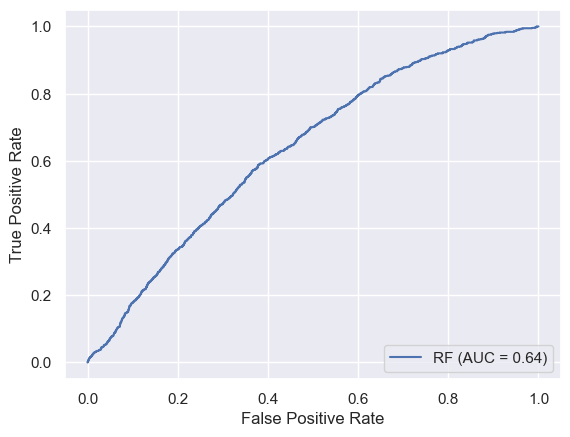

In [58]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='RF')
display.plot()
plt.show()

In [59]:
metrics.roc_auc_score(y_test, model_bp.predict_proba(x_test)[:,1])

0.6360746347435673

In [60]:
df=pd.DataFrame({'Correlation':Numerical_df.corr()['is_claim']})

In [61]:
df.sort_values(by='Correlation',ascending=False)

,Correlation
is_claim,1.000000
policy_tenure,0.078747
age_of_policyholder,0.022435
cylinder,0.013434
width,0.009947
displacement,0.007678
length,0.006495
gross_weight,0.003894
ncap_rating,0.003800
airbags,0.002789


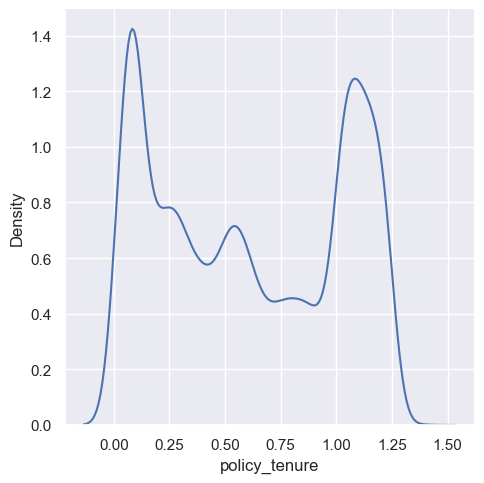

In [64]:
sns.displot(company['policy_tenure'],kind='kde')

<AxesSubplot:xlabel='policy_tenure'>

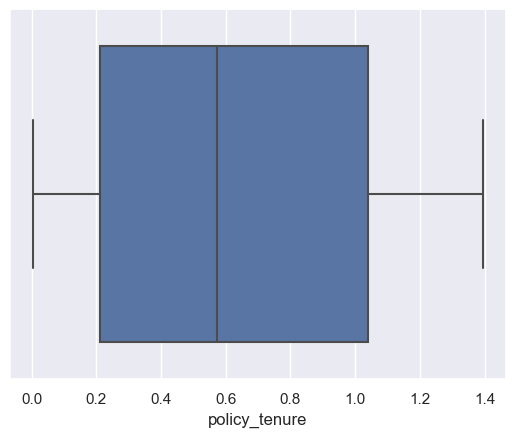

In [66]:
sns.boxplot(x=company['policy_tenure'])

In [82]:
feature_rank = pd.DataFrame({'feature': x_sm.columns, 'importance': model_bp.feature_importances_})

In [83]:
feature_rank = feature_rank.sort_values('importance', ascending = False)

In [88]:
pd.set_option('display.max_rows', None)
feature_rank

,feature,importance
1,age_of_car,0.395416
0,policy_tenure,0.225542
2,age_of_policyholder,0.170445
3,population_density,0.032267
56,area_cluster_C8,0.018450
13,displacement,0.006918
21,height,0.006808
47,area_cluster_C2,0.006688
19,length,0.006127
75,max_power_40.36bhp@6000rpm,0.005762


<AxesSubplot:xlabel='is_claim', ylabel='age_of_car'>

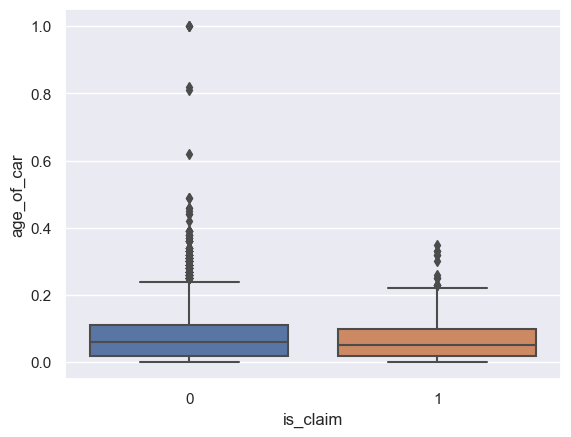

In [96]:
sns.boxplot(y = 'age_of_car', x = 'is_claim', data = company)

<AxesSubplot:xlabel='is_claim', ylabel='policy_tenure'>

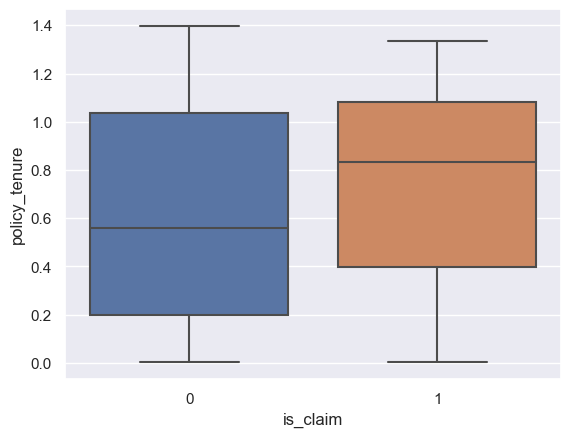

In [99]:
sns.boxplot(y = 'policy_tenure', x = 'is_claim', data = company)